### Simple linear Regression Model in python
##### Home prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model






In [2]:
#Load load from git hub
home_price_df = pd.read_csv("https://raw.githubusercontent.com/josephjaiyeola/home_prediction_LM/main/data/homeprices.csv")
home_price_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


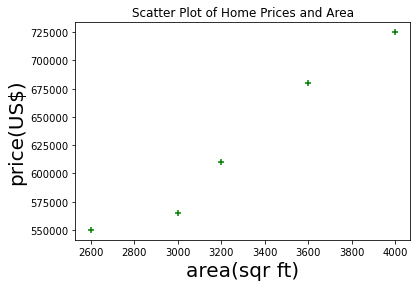

In [3]:
#create a scatter plot of home prices and area
%matplotlib inline
plt.xlabel('area(sqr ft)', fontsize = 20)
plt.ylabel('price(US$)', fontsize = 20)
plt.title('Scatter Plot of Home Prices and Area')
plt.scatter(home_price_df.area, home_price_df.price, color = 'green', marker = '+')

In [4]:
#set the linear model to reg
reg = linear_model.LinearRegression()
reg.fit(home_price_df[['area']], home_price_df.price)

LinearRegression()

In [5]:
#predict the price at a certain data point
reg.predict([[3300]])

/Users/josephjaiyeola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
#figure out what is the regression coef to know whats happening behind the scene
reg.coef_

array([135.78767123])

In [7]:
#get the regression intercept
reg.intercept_

180616.43835616432

In [9]:
#regression formular
#y = m*x +b



In [8]:
#load in a new data set for the sake of predicting the price
area_df = pd.read_csv("https://raw.githubusercontent.com/josephjaiyeola/home_prediction_LM/main/data/areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [9]:
#plug in the regression model and fit it into the new data set
predict = reg.predict(area_df)
predict

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [10]:
#create a new column and insert the prediction into the data frame
area_df['prices'] = predict
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [11]:
# convert the predicted data and saved it to csv, the index = false removes the index
area_df.to_csv("prediction.csv", index = False)

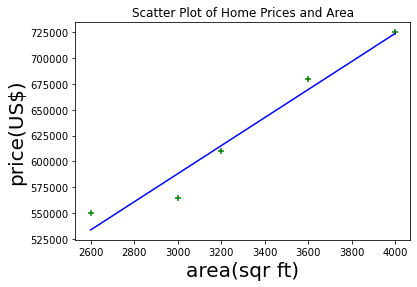

In [12]:
#show the previous scatter plot and also the prediction line 
%matplotlib inline
plt.xlabel('area(sqr ft)', fontsize = 20)
plt.ylabel('price(US$)', fontsize = 20)
plt.title('Scatter Plot of Home Prices and Area')
#the real scatter plot
plt.scatter(home_price_df.area, home_price_df.price, color = 'green', marker = '+')
#prediction plot
plt.plot(home_price_df.area, reg.predict(home_price_df[['area']]), color = 'blue')

#### How to save a model file so you dont have to run from the data

In [14]:
### You can train your model just once and save it to a file
import pickle
with open ('model_pickle', 'wb') as f:
    pickle.dump(reg, f) #dump my reg model into the file called f

# our model is saved into a file now

In [19]:
#try using the model we just saved 
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [24]:
#using mp to make the prediction without having the original data set will give the same result
mp.predict([[3000]])



/Users/josephjaiyeola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [23]:
# it gives the same answer
reg.predict([[3000]])

/Users/josephjaiyeola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

#### Alternative way to save a model file

In [28]:
#load library
#from sklearn.externals import joblib
#this just saved the model directly
import joblib
joblib.dump(reg, 'model_joblib')


['model_joblib']

In [29]:
# Now load your model
mj = joblib.load('model_joblib')

In [32]:
#test it by making a prediction
mj.predict([[3000]])

/Users/josephjaiyeola/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [33]:
mj.coef_

array([135.78767123])

In [34]:
mj.intercept_

180616.43835616432

In [ ]:
#continue from here
#

#
#https://www.youtube.com/watch?v=8jazNUpO3lQ&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=2